In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df1,df2=pd.read_csv("ttrain.csv"),pd.read_csv("ttest.csv")

In [3]:
df1.shape,df2.shape

((891, 12), (418, 11))

In [4]:
df=pd.concat([df1,df2],ignore_index=True)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
df.Name.value_counts()

Kelly, Mr. James                                         2
Connolly, Miss. Kate                                     2
Bjorklund, Mr. Ernst Herbert                             1
Abelson, Mrs. Samuel (Hannah Wizosky)                    1
Palsson, Miss. Torborg Danira                            1
                                                        ..
Braund, Mr. Owen Harris                                  1
Compton, Mrs. Alexander Taylor (Mary Eliza Ingersoll)    1
Risien, Mr. Samuel Beard                                 1
Danbom, Mr. Ernst Gilbert                                1
Colley, Mr. Edward Pomeroy                               1
Name: Name, Length: 1307, dtype: int64

In [9]:
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Dr','Major','Col','Capt','Sir','Rev','Jonkheer','Don'],'Mr')

<AxesSubplot:xlabel='Title', ylabel='count'>

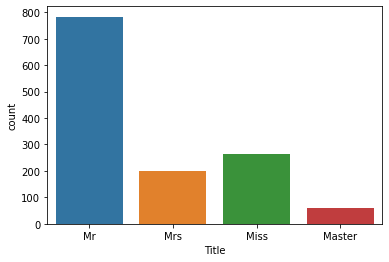

In [10]:
df['Title'].value_counts()
sns.countplot(df["Title"])

<AxesSubplot:xlabel='Senior', ylabel='count'>

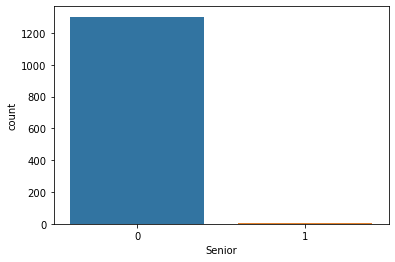

In [11]:
df["Senior"]=df["Age"].map(lambda s:1 if s>70 else 0)
sns.countplot(df["Senior"])

In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
Title             0
Senior            0
dtype: int64

<AxesSubplot:xlabel='Title'>

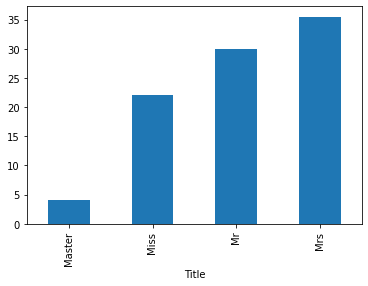

In [13]:
#Age'i ortalama değerleri ile dolduralım
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.groupby("Title")["Age"].median().plot.bar()

In [14]:
del df["Cabin"]

In [15]:
df["Fare"].fillna(df["Fare"].median(),inplace=True)

In [16]:
df['Family']=df['SibSp']+df['Parch']+1

<AxesSubplot:xlabel='Embarked', ylabel='count'>

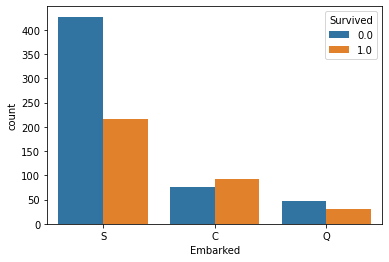

In [17]:
sns.countplot(df["Embarked"],hue=df["Survived"])

In [18]:
df["Embarked"]=df["Embarked"].fillna("S")

<AxesSubplot:xlabel='Age', ylabel='Count'>

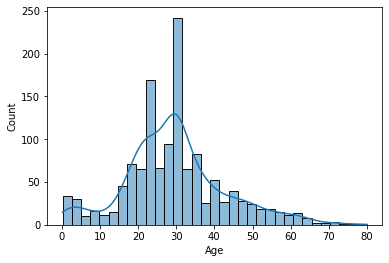

In [19]:
sns.histplot(df["Age"],kde=True)

<AxesSubplot:xlabel='Family', ylabel='Count'>

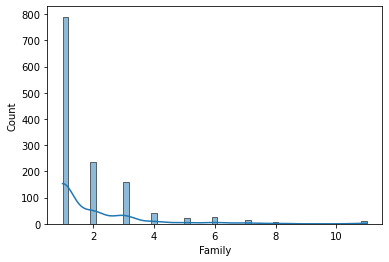

In [20]:
sns.histplot(df["Family"],kde=True)

In [21]:
df.drop(['Ticket'],axis=1,inplace=True)

In [22]:
df.drop("Name",axis=1,inplace=True)

In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
df.shape

(1309, 15)

In [25]:
x,y=df[:891].drop("Survived",axis=1),df[:891][["Survived"]]

In [26]:
x.shape,y.shape

((891, 14), (891, 1))

In [27]:
#pip install tensorflow

In [28]:
#pip install keras

In [29]:
#Modeller için fonksiyon yazıldı
def result_func(model,count):
    predict_x=model.predict(df[891:].drop("Survived",axis=1))
    result_dataset=pd.DataFrame()
    result_dataset["PassengerId"]=df[891:]["PassengerId"]
    result_dataset["Predict"]=predict_x
    result_dataset["Survived"]=result_dataset["Predict"].map(lambda s:1 if s>=0.5 else 0 )
    print(result_dataset["Survived"].value_counts().plot.bar())
    result_dataset.drop("Predict",axis=1).to_csv("titanic_deep_learning_result_model{}.csv".format(count),index=False)
    return result_dataset 

## 1.Model

In [30]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [31]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [32]:
model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 766us/step - loss: 29.4940 - accuracy: 0.6119
Epoch 2/150
90/90 [==============================] - 0s 735us/step - loss: 1.0335 - accuracy: 0.5056
Epoch 3/150
90/90 [==============================] - 0s 742us/step - loss: 0.7335 - accuracy: 0.6354
Epoch 4/150
90/90 [==============================] - 0s 635us/step - loss: 0.6137 - accuracy: 0.6748
Epoch 5/150
90/90 [==============================] - 0s 721us/step - loss: 0.6180 - accuracy: 0.6678
Epoch 6/150
90/90 [==============================] - 0s 742us/step - loss: 0.6128 - accuracy: 0.6526
Epoch 7/150
90/90 [==============================] - 0s 658us/step - loss: 0.6026 - accuracy: 0.6633
Epoch 8/150
90/90 [==============================] - 0s 705us/step - loss: 0.6126 - accuracy: 0.6725
Epoch 9/150
90/90 [==============================] - 0s 659us/step - loss: 0.7015 - accuracy: 0.6442
Epoch 10/150
90/90 [==============================] - 0s 614us/step - loss: 0.6760 - accur

90/90 [==============================] - 0s 565us/step - loss: 0.4581 - accuracy: 0.7878
Epoch 82/150
90/90 [==============================] - 0s 606us/step - loss: 0.4544 - accuracy: 0.7950
Epoch 83/150
90/90 [==============================] - 0s 561us/step - loss: 0.4591 - accuracy: 0.8006
Epoch 84/150
90/90 [==============================] - 0s 608us/step - loss: 0.4732 - accuracy: 0.7820
Epoch 85/150
90/90 [==============================] - 0s 676us/step - loss: 0.4143 - accuracy: 0.8237
Epoch 86/150
90/90 [==============================] - 0s 591us/step - loss: 0.6896 - accuracy: 0.7314
Epoch 87/150
90/90 [==============================] - 0s 526us/step - loss: 0.4887 - accuracy: 0.7880
Epoch 88/150
90/90 [==============================] - 0s 527us/step - loss: 0.4366 - accuracy: 0.8128
Epoch 89/150
90/90 [==============================] - 0s 530us/step - loss: 0.4491 - accuracy: 0.7980
Epoch 90/150
90/90 [==============================] - 0s 529us/step - loss: 0.5210 - accuracy: 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [34]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 665us/step - loss: 0.4225 - accuracy: 0.8114


In [35]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 81.14%


AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.040127,0
892,893,0.283586,0
893,894,0.039779,0
894,895,0.035323,0
895,896,0.389607,0
...,...,...,...
1304,1305,0.018173,0
1305,1306,0.994109,1
1306,1307,0.014552,0
1307,1308,0.018097,0


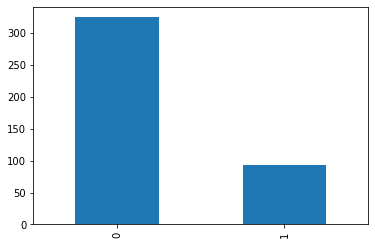

In [36]:
## Birinci model için (model.fit(x,y,epochs=150,batch_size=10,verbose=1))
result_func(model,1)

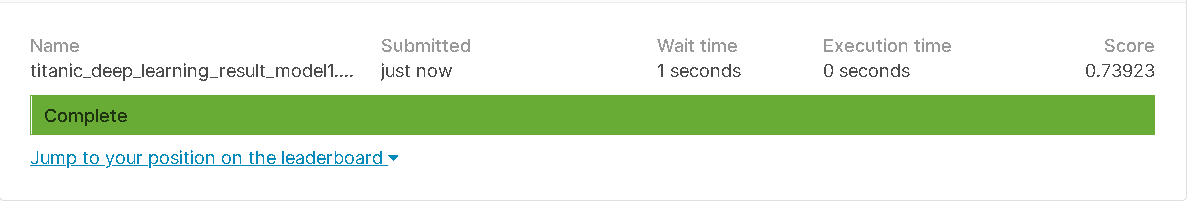

In [37]:
history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 0s 796us/step - loss: 0.4290 - accuracy: 0.8013
Epoch 2/150
90/90 [==============================] - 0s 638us/step - loss: 0.4261 - accuracy: 0.8114
Epoch 3/150
90/90 [==============================] - 0s 640us/step - loss: 0.4283 - accuracy: 0.8025
Epoch 4/150
90/90 [==============================] - 0s 661us/step - loss: 0.4295 - accuracy: 0.8137
Epoch 5/150
90/90 [==============================] - 0s 731us/step - loss: 0.4230 - accuracy: 0.8058
Epoch 6/150
90/90 [==============================] - 0s 669us/step - loss: 0.4408 - accuracy: 0.7957
Epoch 7/150
90/90 [==============================] - 0s 649us/step - loss: 0.4231 - accuracy: 0.8047
Epoch 8/150
90/90 [==============================] - 0s 686us/step - loss: 0.4202 - accuracy: 0.8193
Epoch 9/150
90/90 [==============================] - 0s 697us/step - loss: 0.4178 - accuracy: 0.8114
Epoch 10/150
90/90 [==============================] - 0s 702us/step - loss: 0.4374 - accura

90/90 [==============================] - 0s 627us/step - loss: 0.4494 - accuracy: 0.7980
Epoch 82/150
90/90 [==============================] - 0s 618us/step - loss: 0.4182 - accuracy: 0.8193
Epoch 83/150
90/90 [==============================] - 0s 574us/step - loss: 0.4381 - accuracy: 0.8036
Epoch 84/150
90/90 [==============================] - 0s 582us/step - loss: 0.4176 - accuracy: 0.8159
Epoch 85/150
90/90 [==============================] - 0s 641us/step - loss: 0.4145 - accuracy: 0.8114
Epoch 86/150
90/90 [==============================] - 0s 665us/step - loss: 0.4253 - accuracy: 0.8137
Epoch 87/150
90/90 [==============================] - 0s 591us/step - loss: 0.4057 - accuracy: 0.8283
Epoch 88/150
90/90 [==============================] - 0s 547us/step - loss: 0.4185 - accuracy: 0.8148
Epoch 89/150
90/90 [==============================] - 0s 552us/step - loss: 0.4244 - accuracy: 0.8103
Epoch 90/150
90/90 [==============================] - 0s 561us/step - loss: 0.4117 - accuracy: 

In [38]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


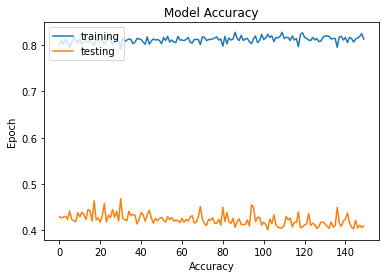

In [39]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

## 2.Model

In [66]:
model=Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(9,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [68]:
model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 1s - loss: 13.1218 - accuracy: 0.4059 - val_loss: 15.1004 - val_accuracy: 0.3575
Epoch 2/200
72/72 - 0s - loss: 1.9191 - accuracy: 0.5730 - val_loss: 0.7282 - val_accuracy: 0.6760
Epoch 3/200
72/72 - 0s - loss: 0.6882 - accuracy: 0.6798 - val_loss: 0.6396 - val_accuracy: 0.7318
Epoch 4/200
72/72 - 0s - loss: 0.6739 - accuracy: 0.6756 - val_loss: 0.6273 - val_accuracy: 0.7318
Epoch 5/200
72/72 - 0s - loss: 0.6663 - accuracy: 0.6756 - val_loss: 0.6311 - val_accuracy: 0.7151
Epoch 6/200
72/72 - 0s - loss: 0.6638 - accuracy: 0.6699 - val_loss: 0.6372 - val_accuracy: 0.7095
Epoch 7/200
72/72 - 0s - loss: 0.6595 - accuracy: 0.6629 - val_loss: 0.6551 - val_accuracy: 0.6704
Epoch 8/200
72/72 - 0s - loss: 0.6561 - accuracy: 0.6671 - val_loss: 0.6252 - val_accuracy: 0.7095
Epoch 9/200
72/72 - 0s - loss: 0.6512 - accuracy: 0.6685 - val_loss: 0.6239 - val_accuracy: 0.7095
Epoch 10/200
72/72 - 0s - loss: 0.6467 - accuracy: 0.6742 - val_loss: 0.6427 - val_accuracy: 0.6927
Epoch 1

Epoch 83/200
72/72 - 0s - loss: 0.4407 - accuracy: 0.8104 - val_loss: 0.3588 - val_accuracy: 0.8156
Epoch 84/200
72/72 - 0s - loss: 0.4313 - accuracy: 0.8174 - val_loss: 0.4153 - val_accuracy: 0.8045
Epoch 85/200
72/72 - 0s - loss: 0.4289 - accuracy: 0.8174 - val_loss: 0.3555 - val_accuracy: 0.8156
Epoch 86/200
72/72 - 0s - loss: 0.4401 - accuracy: 0.8104 - val_loss: 0.4391 - val_accuracy: 0.7989
Epoch 87/200
72/72 - 0s - loss: 0.4303 - accuracy: 0.8132 - val_loss: 0.3689 - val_accuracy: 0.8436
Epoch 88/200
72/72 - 0s - loss: 0.4307 - accuracy: 0.8048 - val_loss: 0.3719 - val_accuracy: 0.8324
Epoch 89/200
72/72 - 0s - loss: 0.4257 - accuracy: 0.8146 - val_loss: 0.3697 - val_accuracy: 0.8268
Epoch 90/200
72/72 - 0s - loss: 0.4256 - accuracy: 0.8174 - val_loss: 0.3760 - val_accuracy: 0.8045
Epoch 91/200
72/72 - 0s - loss: 0.4269 - accuracy: 0.8034 - val_loss: 0.3706 - val_accuracy: 0.8045
Epoch 92/200
72/72 - 0s - loss: 0.4247 - accuracy: 0.8216 - val_loss: 0.3614 - val_accuracy: 0.8212


Epoch 165/200
72/72 - 0s - loss: 0.3977 - accuracy: 0.8413 - val_loss: 0.5668 - val_accuracy: 0.7877
Epoch 166/200
72/72 - 0s - loss: 0.4146 - accuracy: 0.8329 - val_loss: 0.4597 - val_accuracy: 0.8380
Epoch 167/200
72/72 - 0s - loss: 0.4043 - accuracy: 0.8202 - val_loss: 0.3944 - val_accuracy: 0.8045
Epoch 168/200
72/72 - 0s - loss: 0.4010 - accuracy: 0.8371 - val_loss: 0.3900 - val_accuracy: 0.8156
Epoch 169/200
72/72 - 0s - loss: 0.4061 - accuracy: 0.8301 - val_loss: 0.3946 - val_accuracy: 0.8156
Epoch 170/200
72/72 - 0s - loss: 0.3891 - accuracy: 0.8399 - val_loss: 0.3935 - val_accuracy: 0.8101
Epoch 171/200
72/72 - 0s - loss: 0.3957 - accuracy: 0.8343 - val_loss: 0.4069 - val_accuracy: 0.8045
Epoch 172/200
72/72 - 0s - loss: 0.4107 - accuracy: 0.8371 - val_loss: 0.4125 - val_accuracy: 0.8101
Epoch 173/200
72/72 - 0s - loss: 0.3993 - accuracy: 0.8287 - val_loss: 0.3911 - val_accuracy: 0.8268
Epoch 174/200
72/72 - 0s - loss: 0.3852 - accuracy: 0.8357 - val_loss: 0.4118 - val_accurac

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_21 (Dense)             (None, 9)                 135       
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 40        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 390
Trainable params: 390
Non-trainable params: 0
_________________________________________________________________


In [70]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 940us/step - loss: 0.3750 - accuracy: 0.8462


In [71]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 84.62%


AxesSubplot(0.125,0.125;0.775x0.755)


,PassengerId,Predict,Survived
891,892,0.063919,0
892,893,0.109399,0
893,894,0.063213,0
894,895,0.056440,0
895,896,0.129269,0
...,...,...,...
1304,1305,0.024574,0
1305,1306,0.999885,1
1306,1307,0.021672,0
1307,1308,0.024439,0


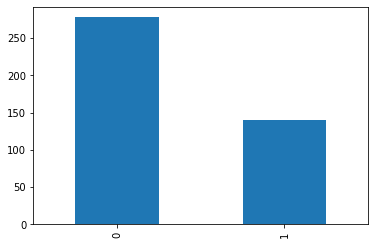

In [72]:
## İkinci model için model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2))
result_func(model,2)

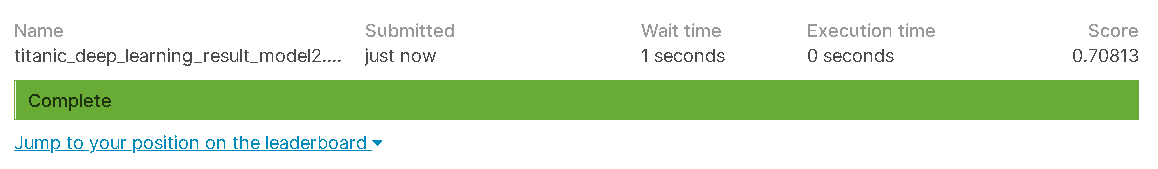

In [73]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.3829 - accuracy: 0.8469 - val_loss: 0.5121 - val_accuracy: 0.8212
Epoch 2/200
72/72 - 0s - loss: 0.3901 - accuracy: 0.8441 - val_loss: 0.3979 - val_accuracy: 0.8212
Epoch 3/200
72/72 - 0s - loss: 0.3819 - accuracy: 0.8455 - val_loss: 0.4189 - val_accuracy: 0.8268
Epoch 4/200
72/72 - 0s - loss: 0.3824 - accuracy: 0.8385 - val_loss: 0.4207 - val_accuracy: 0.8045
Epoch 5/200
72/72 - 0s - loss: 0.3885 - accuracy: 0.8371 - val_loss: 0.4046 - val_accuracy: 0.8268
Epoch 6/200
72/72 - 0s - loss: 0.4137 - accuracy: 0.8160 - val_loss: 0.4031 - val_accuracy: 0.8156
Epoch 7/200
72/72 - 0s - loss: 0.3974 - accuracy: 0.8287 - val_loss: 0.4234 - val_accuracy: 0.8101
Epoch 8/200
72/72 - 0s - loss: 0.3849 - accuracy: 0.8483 - val_loss: 0.4023 - val_accuracy: 0.8380
Epoch 9/200
72/72 - 0s - loss: 0.3892 - accuracy: 0.8371 - val_loss: 0.3956 - val_accuracy: 0.8156
Epoch 10/200
72/72 - 0s - loss: 0.3728 - accuracy: 0.8469 - val_loss: 0.4068 - val_accuracy: 0.8268
Epoch 11/

72/72 - 0s - loss: 0.3710 - accuracy: 0.8441 - val_loss: 0.4452 - val_accuracy: 0.8045
Epoch 84/200
72/72 - 0s - loss: 0.3731 - accuracy: 0.8483 - val_loss: 0.4234 - val_accuracy: 0.7989
Epoch 85/200
72/72 - 0s - loss: 0.3765 - accuracy: 0.8441 - val_loss: 0.4271 - val_accuracy: 0.8156
Epoch 86/200
72/72 - 0s - loss: 0.3754 - accuracy: 0.8427 - val_loss: 0.4436 - val_accuracy: 0.8101
Epoch 87/200
72/72 - 0s - loss: 0.3677 - accuracy: 0.8497 - val_loss: 0.4025 - val_accuracy: 0.8156
Epoch 88/200
72/72 - 0s - loss: 0.3767 - accuracy: 0.8469 - val_loss: 0.4041 - val_accuracy: 0.8212
Epoch 89/200
72/72 - 0s - loss: 0.3646 - accuracy: 0.8539 - val_loss: 0.4297 - val_accuracy: 0.8436
Epoch 90/200
72/72 - 0s - loss: 0.3706 - accuracy: 0.8399 - val_loss: 0.4878 - val_accuracy: 0.8380
Epoch 91/200
72/72 - 0s - loss: 0.3725 - accuracy: 0.8427 - val_loss: 0.4865 - val_accuracy: 0.8324
Epoch 92/200
72/72 - 0s - loss: 0.3672 - accuracy: 0.8385 - val_loss: 0.4625 - val_accuracy: 0.8436
Epoch 93/200


Epoch 165/200
72/72 - 0s - loss: 0.3629 - accuracy: 0.8469 - val_loss: 0.4148 - val_accuracy: 0.8492
Epoch 166/200
72/72 - 0s - loss: 0.3628 - accuracy: 0.8413 - val_loss: 0.3982 - val_accuracy: 0.8268
Epoch 167/200
72/72 - 0s - loss: 0.3577 - accuracy: 0.8497 - val_loss: 0.4411 - val_accuracy: 0.8156
Epoch 168/200
72/72 - 0s - loss: 0.3605 - accuracy: 0.8441 - val_loss: 0.4063 - val_accuracy: 0.8045
Epoch 169/200
72/72 - 0s - loss: 0.3592 - accuracy: 0.8581 - val_loss: 0.5957 - val_accuracy: 0.8156
Epoch 170/200
72/72 - 0s - loss: 0.3745 - accuracy: 0.8413 - val_loss: 0.4008 - val_accuracy: 0.8380
Epoch 171/200
72/72 - 0s - loss: 0.3684 - accuracy: 0.8483 - val_loss: 0.4763 - val_accuracy: 0.8268
Epoch 172/200
72/72 - 0s - loss: 0.3886 - accuracy: 0.8371 - val_loss: 0.3827 - val_accuracy: 0.8212
Epoch 173/200
72/72 - 0s - loss: 0.3640 - accuracy: 0.8497 - val_loss: 0.3950 - val_accuracy: 0.8380
Epoch 174/200
72/72 - 0s - loss: 0.3600 - accuracy: 0.8483 - val_loss: 0.3953 - val_accurac

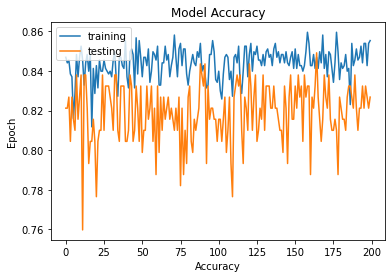

In [74]:
fig1=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

<function matplotlib.pyplot.show(close=None, block=None)>

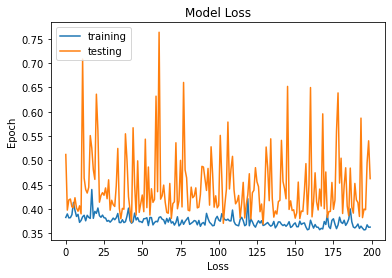

In [75]:
fig1=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left")

plt.show